In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import random
import pickle
import zipfile
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tensorflow.keras.callbacks import TensorBoard
import time
from sklearn.metrics import confusion_matrix

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


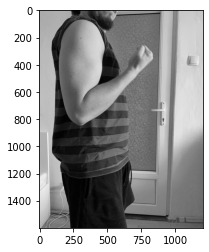

In [7]:

DATADIR = '/content/gdrive/MyDrive'
CATEGORIES = ['good form', 'bad form']

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break


In [8]:
print(img_array.shape)

(1600, 1200)


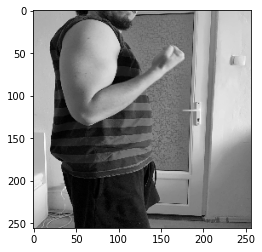

In [9]:
IMG_SIZE= 256
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [48]:
data = []

def create_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      data.append([new_array, class_num])

create_data()

In [64]:
random.shuffle(data)
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

In [65]:
print(len(train_data))

265


In [66]:
random.shuffle(train_data)

In [78]:
x_train = []
y_train = []

for feature, label in train_data:
  x_train.append(feature)
  y_train.append(label)

x_train = np.array(x_train).reshape(-1, IMG_SIZE,IMG_SIZE,1)
x_train = x_train /255

y_train = np.array(y_train)

In [79]:
x_test = []
y_test = []

for feature, label in test_data:
  x_test.append(feature)
  y_test.append(label)

x_test = np.array(x_test).reshape(-1, IMG_SIZE,IMG_SIZE,1)
x_test = x_test /255

y_test = np.array(y_test)

In [30]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [58]:

NAME = f'conv_newdata_{int(time.time())}'
tensorboard = TensorBoard(log_dir=f'logs/{NAME}')

In [80]:

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])




In [81]:
# antrenare
model.fit(x_train,y_train,epochs=4,batch_size=12,validation_split=0.3, callbacks=[tensorboard])

Epoch 1/4
16/16 [==============================] - 28s 2s/step - loss: 3.4580 - accuracy: 0.7365 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/4
16/16 [==============================] - 28s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.3357e-05 - val_accuracy: 1.0000
Epoch 3/4
16/16 [==============================] - 28s 2s/step - loss: 2.1177e-06 - accuracy: 1.0000 - val_loss: 2.2288e-07 - val_accuracy: 1.0000
Epoch 4/4
16/16 [==============================] - 28s 2s/step - loss: 2.6049e-07 - accuracy: 1.0000 - val_loss: 1.2795e-06 - val_accuracy: 1.0000


In [ ]:
%tensorboard --logdir logs

In [82]:
# testare
output = model.predict(x_test)
# output = output.reshape(-1)
print(len(y_test))
print(confusion_matrix(y_test, output.round()))


67
[[33  0]
 [ 0 34]]
